# ** finding new way to rep the sliding window** 
--> need to weght by the initial weights 

** imports and global object creation ** 

In [1]:
import matplotlib.pyplot as plt
import numpy
import json
import numpy.random
import copy
import numpy as np 
from datetime import datetime #for plotting 
from tqdm import tqdm

In [81]:
plt.style.use("seaborn-darkgrid")

In [3]:
#initial half model 
model = {'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GAC': [0.38170347003154576, {'GGC': 0.581267217630854, 'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516}], 'TCA': [0.44338655339094774, {'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618, 'TAA': 0.12685827552031714}], 'CCA': [0.4589957500393515, {'CAA': 0.10185185185185185, 'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226}], 'GCC': [0.5527913809990206, {'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702, 'GTC': 0.5985116938341601}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'GCA': [0.49819102749638206, {'GGA': 0.15359477124183007, 'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'AAT': 0.1551043429216018, 'ATT': 0.5964467005076142}], 'TAT': [0.544423228125351, {'TCT': 0.07654219104600785, 'TGT': 0.8021456571074892, 'TTT': 0.12131215184650299}], 'CAG': [0.4073735527117611, {'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346, 'CTG': 0.1480927449513837}], 'AAA': [0.3198252625708709, {'AGA': 0.5239755884917175, 'ATA': 0.17988956698634118, 'ACA': 0.2961348445219413}], 'CCG': [0.943577893317928, {'CAG': 0.01, 'CGG': 0.04673469387755102, 'CTG': 0.943265306122449}], 'CAA': [0.36173285198555954, {'CCA': 0.28493013972055886, 'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296}], 'ACA': [0.5516478655164787, {'AGA': 0.17802726543704891, 'ATA': 0.6555733761026463, 'AAA': 0.16639935846030474}], 'GCT': [0.5081906865451868, {'GAT': 0.16334661354581673, 'GGT': 0.20101412531691415, 'GTT': 0.6356392611372691}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GGG': 0.5530104712041884, 'GCG': 0.21662303664921467}], 'AAT': [0.48758198043221157, {'ACT': 0.1133406835722161, 'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224}], 'GCG': [0.9428571428571428, {'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185, 'GAG': 0.06703397612488522}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CAC': 0.11974567290709998, 'CGC': 0.2352525609325327}], 'ACC': [0.6345660930062248, {'ATC': 0.532602423542989, 'AAC': 0.3147720715522216, 'AGC': 0.15262550490478938}], 'TCT': [0.4717741935483871, {'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228, 'TTT': 0.47611865258924085}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TAG': 0.026896942242355604, 'TTG': 0.9210079275198187}], 'AAC': [0.3978541712283775, {'AGC': 0.6692350027517887, 'ACC': 0.17776554760594387, 'ATC': 0.15299944964226747}], 'GAT': [0.4466903598400711, {'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162, 'GTT': 0.2973644952759821}], 'TAG': [0.38808618504435993, {'TGG': 0.6962769431743958, 'TCG': 0.16525146962769433, 'TTG': 0.13847158719790986}], 'GAA': [0.30323054331864907, {'GGA': 0.5617433414043583, 'GTA': 0.19915254237288135, 'GCA': 0.2391041162227603}], 'CAT': [0.5741935483870968, {'CGT': 0.716724286949006, 'CTT': 0.1497407087294728, 'CCT': 0.13353500432152118}], 'TCC': [0.5196784458214705, {'TGC': 0.22687721559780857, 'TTC': 0.602964872703835, 'TAC': 0.17015791169835642}], 'TAC': [0.4143262045864468, {'TGC': 0.7276119402985075, 'TTC': 0.1455223880597015, 'TCC': 0.12686567164179105}]}
#doubled model 
model = {'GTC': [0.38170347003154576, {'GCC': 0.581267217630854, 'GGC': 0.17447199265381083, 'GAC': 0.24426078971533516}], 'TGA': [0.44338655339094774, {'TAA': 0.6247109349190618, 'TTA': 0.12685827552031714, 'TCA': 0.2484307895606211}], 'TAT': [0.544423228125351, {'TTT': 0.12131215184650299, 'TGT': 0.8021456571074892, 'TCT': 0.07654219104600785}], 'CGC': [0.9428571428571428, {'CTC': 0.06703397612488522, 'CCC': 0.027548209366391185, 'CAC': 0.9054178145087236}], 'ATT': [0.48758198043221157, {'AGT': 0.1133406835722161, 'ACT': 0.7592061742006616, 'AAT': 0.1274531422271224}], 'GCA': [0.49819102749638206, {'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083, 'GGA': 0.15359477124183007}], 'CGT': [0.9583888149134487, {'CTT': 0.04341785342132685, 'CCT': 0.03403959708232025, 'CAT': 0.922542549496353}], 'CCA': [0.4589957500393515, {'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226, 'CAA': 0.10185185185185185}], 'GGA': [0.5196784458214705, {'GTA': 0.17015791169835642, 'GAA': 0.602964872703835, 'GCA': 0.22687721559780857}], 'AAA': [0.3198252625708709, {'ACA': 0.2961348445219413, 'ATA': 0.17988956698634118, 'AGA': 0.5239755884917175}], 'AAC': [0.3978541712283775, {'ACC': 0.17776554760594387, 'AGC': 0.6692350027517887, 'ATC': 0.15299944964226747}], 'CTC': [0.3202682875707399, {'CGC': 0.21662303664921467, 'CCC': 0.5530104712041884, 'CAC': 0.23036649214659685}], 'AGG': [0.5123493090267568, {'ACG': 0.22955523672883785, 'AAG': 0.6662840746054519, 'ATG': 0.10416068866571017}], 'AGA': [0.4717741935483871, {'ACA': 0.34816490698843644, 'AAA': 0.47611865258924085, 'ATA': 0.1757164404223228}], 'AGC': [0.5081906865451868, {'ACC': 0.20101412531691415, 'AAC': 0.6356392611372691, 'ATC': 0.16334661354581673}], 'CAA': [0.36173285198555954, {'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296, 'CCA': 0.28493013972055886}], 'CTT': [0.35645079041305455, {'CGT': 0.2341440152598951, 'CCT': 0.6132570338578922, 'CAT': 0.15259895088221268}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'TAG': [0.38808618504435993, {'TCG': 0.16525146962769433, 'TGG': 0.6962769431743958, 'TTG': 0.13847158719790986}], 'ACA': [0.5516478655164787, {'ATA': 0.6555733761026463, 'AGA': 0.17802726543704891, 'AAA': 0.16639935846030474}], 'CTG': [0.4073735527117611, {'CGG': 0.20905011219147346, 'CAG': 0.1480927449513837, 'CCG': 0.6428571428571429}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'ATT': 0.5964467005076142, 'AAT': 0.1551043429216018}], 'TTA': [0.3860215053763441, {'TGA': 0.20533227218463987, 'TAA': 0.22682053322721846, 'TCA': 0.5678471945881417}], 'CGA': [0.9197916666666667, {'CTA': 0.026896942242355604, 'CAA': 0.9210079275198187, 'CCA': 0.052095130237825596}], 'GTA': [0.4143262045864468, {'GGA': 0.12686567164179105, 'GAA': 0.1455223880597015, 'GCA': 0.7276119402985075}], 'GGC': [0.5527913809990206, {'GCC': 0.1630049610205528, 'GTC': 0.23848334514528702, 'GAC': 0.5985116938341601}], 'AGT': [0.5261127596439169, {'ATT': 0.1551043429216018, 'ACT': 0.24844895657078397, 'AAT': 0.5964467005076142}], 'AAT': [0.48758198043221157, {'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224, 'ACT': 0.1133406835722161}], 'CCG': [0.943577893317928, {'CTG': 0.943265306122449, 'CGG': 0.04673469387755102, 'CAG': 0.01}], 'ACC': [0.6345660930062248, {'AAC': 0.3147720715522216, 'ATC': 0.532602423542989, 'AGC': 0.15262550490478938}], 'TCC': [0.5196784458214705, {'TTC': 0.602964872703835, 'TGC': 0.22687721559780857, 'TAC': 0.17015791169835642}], 'TCT': [0.4717741935483871, {'TTT': 0.47611865258924085, 'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228}], 'CAG': [0.4073735527117611, {'CTG': 0.1480927449513837, 'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346}], 'TTG': [0.36173285198555954, {'TCG': 0.5768463073852296, 'TGG': 0.28493013972055886, 'TAG': 0.13822355289421157}], 'ATC': [0.4466903598400711, {'ACC': 0.5862754848334162, 'AAC': 0.2973644952759821, 'AGC': 0.11636001989060167}], 'CGG': [0.943577893317928, {'CTG': 0.01, 'CAG': 0.943265306122449, 'CCG': 0.04673469387755102}], 'TTC': [0.30323054331864907, {'TGC': 0.2391041162227603, 'TCC': 0.5617433414043583, 'TAC': 0.19915254237288135}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ATG': [0.5741935483870968, {'ACG': 0.716724286949006, 'AAG': 0.1497407087294728, 'AGG': 0.13353500432152118}], 'GGT': [0.6345660930062248, {'GTT': 0.3147720715522216, 'GCT': 0.15262550490478938, 'GAT': 0.532602423542989}], 'TGC': [0.49819102749638206, {'TTC': 0.24473493100944083, 'TCC': 0.15359477124183007, 'TAC': 0.6016702977487292}], 'GTG': [0.3995351785336996, {'GAG': 0.18244315177154943, 'GCG': 0.6139608672659969, 'GGG': 0.20359598096245374}], 'GGG': [0.5453669813138123, {'GAG': 0.6450017661603674, 'GTG': 0.11974567290709998, 'GCG': 0.2352525609325327}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'TGG': [0.4589957500393515, {'TCG': 0.20781893004115226, 'TTG': 0.10185185185185185, 'TAG': 0.6903292181069959}], 'GAA': [0.30323054331864907, {'GTA': 0.19915254237288135, 'GGA': 0.5617433414043583, 'GCA': 0.2391041162227603}], 'GAC': [0.38170347003154576, {'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516, 'GGC': 0.581267217630854}], 'TAC': [0.4143262045864468, {'TTC': 0.1455223880597015, 'TGC': 0.7276119402985075, 'TCC': 0.12686567164179105}], 'GAT': [0.4466903598400711, {'GTT': 0.2973644952759821, 'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162}], 'ATA': [0.544423228125351, {'ACA': 0.8021456571074892, 'AAA': 0.12131215184650299, 'AGA': 0.07654219104600785}], 'GCT': [0.5081906865451868, {'GTT': 0.6356392611372691, 'GGT': 0.20101412531691415, 'GAT': 0.16334661354581673}], 'CAT': [0.5741935483870968, {'CTT': 0.1497407087294728, 'CGT': 0.716724286949006, 'CCT': 0.13353500432152118}], 'CTA': [0.38808618504435993, {'CGA': 0.16525146962769433, 'CAA': 0.13847158719790986, 'CCA': 0.6962769431743958}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'TTT': [0.3198252625708709, {'TCT': 0.5239755884917175, 'TGT': 0.2961348445219413, 'TAT': 0.17988956698634118}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TTG': 0.9210079275198187, 'TAG': 0.026896942242355604}], 'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GTT': [0.3978541712283775, {'GCT': 0.6692350027517887, 'GGT': 0.17776554760594387, 'GAT': 0.15299944964226747}], 'TCA': [0.44338655339094774, {'TAA': 0.12685827552031714, 'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CGC': 0.2352525609325327, 'CAC': 0.11974567290709998}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GCG': 0.21662303664921467, 'GGG': 0.5530104712041884}], 'GCG': [0.9428571428571428, {'GAG': 0.06703397612488522, 'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185}], 'GCC': [0.5527913809990206, {'GTC': 0.5985116938341601, 'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702}], 'TGT': [0.5516478655164787, {'TCT': 0.17802726543704891, 'TAT': 0.6555733761026463, 'TTT': 0.16639935846030474}]}


In [4]:
file_path_initial = "../Old_workbooks_scripting/Scripting_data/"
sim_name_initial = "Files_to_use_for_parallel"

file_path_afterSim = ""
sim_name_afterSim = "Parallel_Trial"

about_sim = "_cds_invariant50"
nTrials = 12

In [5]:
cds_pos_dictionary = open(file_path_initial+sim_name_initial+"_exon_insertion_dict.txt").readlines()[0]
cds_pos_dictionary = json.loads(cds_pos_dictionary)
cds_seq_dictionary = open(file_path_initial+sim_name_initial+"_exons_toUseSeqeunce_dict.txt").readlines()[0]
cds_seq_dictionary = json.loads(cds_seq_dictionary)

In [6]:
file_name = "Files_to_use_for_parallel_DNA_gen0_cds.txt"
DNAI = open(file_path_initial+file_name).readlines()[0]

In [7]:
DNAF_dataDict = {}
#note I want the dna string to be an entry in the list value fo the DNAF dictionary so i can add weigths later 
for index_tmp in range(1,nTrials+1):
    file_name = sim_name_afterSim+str(index_tmp)+"_DNA_final"+about_sim+".txt"
    DNAF_dataDict["Trial"+str(index_tmp)] = open(file_path_afterSim+file_name).readlines()[0]

In [8]:
len(DNAF_dataDict["Trial1"])

100145

In [9]:
weights_initial = []
for i in range(1,len(DNAI)-1): # dont want it to run all the way to the end: need to -1 so last centre index is second last in DNA string 
    if (DNAI[i-1:i+2]) in model: 
        weights_initial.append(model[(DNAI[i-1:i+2])][0])
    else: 
        weights_initial.append(model[reverse_complement(DNAI[i-1:i+2])][0])


In [10]:
cpg_muts = []
for key, value in model.items(): 
    if value[0] >= 0.8 : 
        print(key, value[0])
        cpg_muts.append(value[0])

CGC 0.9428571428571428
CGT 0.9583888149134487
CGA 0.9197916666666667
GCG 0.9428571428571428
ACG 0.9583888149134487
CGG 0.943577893317928
CCG 0.943577893317928
TCG 0.9197916666666667


In [11]:
weights_initial_noCpg = []
cpg_initial_counter = 0
for index, weight in enumerate(weights_initial):  
    if weight in cpg_muts: 
        cpg_initial_counter += 1
        weights_initial_noCpg.append(0.45)
    else: 
        weights_initial_noCpg.append(weight)
        

In [12]:
print(weights_initial[0:20])

[0.943577893317928, 0.5527913809990206, 0.5527913809990206, 0.5453669813138123, 0.943577893317928, 0.9197916666666667, 0.30323054331864907, 0.3978541712283775, 0.5516478655164787, 0.3995351785336996, 0.9583888149134487, 0.9583888149134487, 0.4143262045864468, 0.38808618504435993, 0.5261127596439169, 0.4143262045864468, 0.38808618504435993, 0.5261127596439169, 0.3995351785336996, 0.4589957500393515]


# ** getting average winodw value for each sample, then averaging/sd across samples ** 

ok start witht eh DNAF dadt dictionary 

In [13]:
DNAF_dataDict_noCPGMuts = {}
for key, value in DNAF_dataDict.items(): 
    DNAF_dataDict_noCPGMuts[key] = [value]

In [14]:
# want to append the list of muts to each dnaf entry in dictionary 
for trial_number in range(1,nTrials): 
    trial_name = "Trial"+str(trial_number)
    trial_muts = []
    for index in range(1,len(DNAI)-1): 
        triplet = DNAF_dataDict[trial_name][index-1:index+2]

#nomral with CpGs
        mut =   model[triplet][0] 
        
# if you want no CpGs 
#         if model[triplet][0] in cpg_muts: 
#             mut = 0.45
#         else: 
#             mut = model[triplet][0]

        trial_muts.append(mut)
    DNAF_dataDict_noCPGMuts[trial_name].append(trial_muts)

In [15]:
window_size = 1000

In [16]:
sliding_window_X = []

for i in range(0,len(DNAI), window_size):                                  # 1[len(dnai)] iterating by window size 
    if len(DNAI) - i > window_size:                                        # if you're not RIGHT at the end 
        sliding_window_X.append(i+int(window_size/2)) 

In [17]:
# now want to append every average window mut value to the dnafplus dict 

for trial_number in range(1,nTrials): 
    trial_name = "Trial"+str(trial_number)
    
    trial_muts_list = []
    for i in range(0,len(DNAI), window_size):
        if len(DNAI) - i > window_size: 
            
            av_mut = np.mean(DNAF_dataDict_noCPGMuts[trial_name][1][i:i+window_size])
            trial_muts_list.append(av_mut)
                
        else: 
            print("size of omitted section is : "+str(len(DNAI)-i))
    DNAF_dataDict_noCPGMuts[trial_name].append(trial_muts_list)
    

size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145


In [18]:
# creating the average muts and std list 
sliding_window_avMut = []
sliding_window_SE = []


nwindows = len(DNAF_dataDict_noCPGMuts["Trial1"][2])

for i in range(0,nwindows):
    window_muts = []
    
    
    
    for trial_number in range(1,nTrials): 
        trial_name = "Trial"+str(trial_number)
        window_muts.append(DNAF_dataDict_noCPGMuts[trial_name][2][i])
        
        
    
#     print(window_muts)
#     print(np.mean(window_muts))
#     print(np.std(window_muts)/np.sqrt(nTrials))
    
    
#     break 

    
    sliding_window_avMut.append(np.mean(window_muts))
    sliding_window_SE.append(np.std(window_muts)/np.sqrt(nTrials))
    

In [19]:
initial_weights = []
for index in range(1,len(DNAI)-1): 
    triplet = DNAI[index-1:index+2]
    initial_weights.append(model[triplet][0])

sliding_window_initial = []
for i in range(0,nwindows): 
    start_index = i*window_size+window_size
    sliding_window_initial.append(np.mean(initial_weights[start_index: start_index+window_size]))

In [21]:
print(sliding_window_avMut[0:8])
print(sliding_window_SE[0:8])

[0.47900041662754683, 0.47930286542544298, 0.47831154125061759, 0.48000353521147843, 0.47757581574056401, 0.47945290631187876, 0.48020544607366006, 0.47869923689879351]
[0.0014810626655821098, 0.0014572556269879884, 0.0019609314738221581, 0.0021937506647602988, 0.001568822680739536, 0.00089848280006150287, 0.0020472084563486854, 0.0015984158924570425]


In [33]:
sliding_change = []
sliding_change_prop = []
for i, element in enumerate(sliding_window_avMut): 
    sliding_change.append(element - sliding_window_initial[i]) # final - initial 
    sliding_change_prop.append(element/sliding_window_initial[i]) # final / initial 

In [23]:
#do a double check after file imports 
for gene_id, gene_value in cds_seq_dictionary.items():     
    if DNAI.find(gene_value[0]) != cds_pos_dictionary[gene_id][0]+1: 
        print("ERROR: cds_pos_dict not accurate for this dna for "+gene_id)


In [24]:
cds_pos_list = []
for value in cds_pos_dictionary.values(): 
    cds_pos_list.extend([value[0], value[1]])
cds_pos_list.sort()

In [101]:
plt.style.use('ggplot')

In [88]:
sliding_window_X_10kb = [a/10000 for a in sliding_window_X]

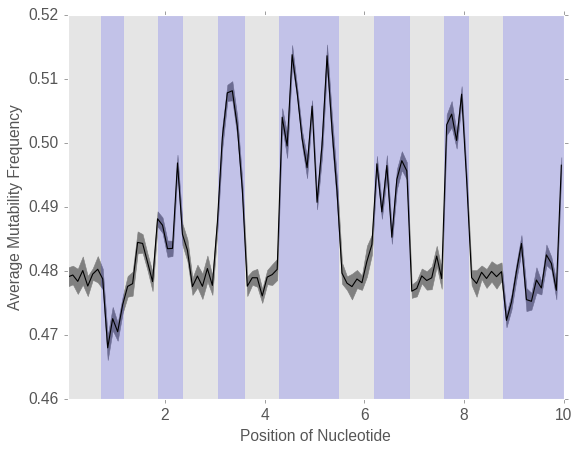

In [109]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
#plt.plot(sliding_window_X, sliding_window_initial, "k", alpha = 0.3, label = "Initial")
plt.plot(sliding_window_X_10kb, sliding_window_avMut, "k", label = "Final")


#plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
# plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")
plt.xticks([0,2,4,6,8,10])

#adding legend
#plt.legend(loc = 2)

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index]/10000, cds_pos_list[index+1]/10000, alpha=.15, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X_10kb,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=10)  # adjust the right leaving left unchanged

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Plots/Sliding_{t}_InitialFinal.png".format(t = timestamp))

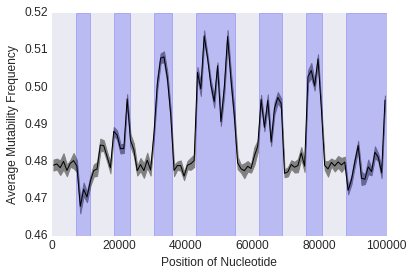

In [84]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
#plt.plot(sliding_window_X, sliding_window_initial, "k", alpha = 0.3, label = "Initial")
plt.plot(sliding_window_X, sliding_window_avMut, "k", label = "Final")


#plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
#plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

#adding legend
#plt.legend(loc = 2)

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.2, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

#font size 

SMALL_SIZE = 14
MEDIUM_SIZE = 12
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Plots/Sliding_{t}_InitialFinal.png".format(t = timestamp))

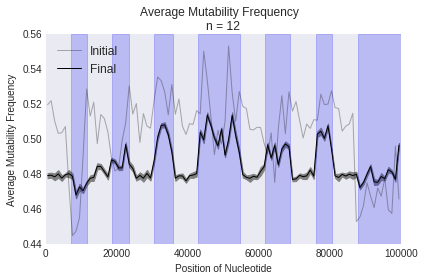

In [65]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_initial, "k", alpha = 0.3, label = "Initial")
plt.plot(sliding_window_X, sliding_window_avMut, "k", label = "Final")


#plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

#adding legend
plt.legend(loc = 2)

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.2, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Plots/Sliding_{t}_InitialFinal.png".format(t = timestamp))

# ** OK NOW GET HORZONTAL MEAN VALUE (ALL INTRON, ALL EXON ) ** 

In [110]:
cds_pos_dictionary

{'ENST00000287097.6': [7141, 11479],
 'ENST00000293879.9': [30563, 35810],
 'ENST00000338368.7': [87850, 100144],
 'ENST00000346169.7': [18621, 23421],
 'ENST00000389722.7': [61872, 68859],
 'ENST00000437464.1': [42952, 54730],
 'ENST00000613019.4': [76001, 80708]}

** EXON** 

In [178]:
exon_mean_mut = []
for i in tqdm(range(1,nTrials+1)):
    trial_name = "Trial"+str(i)
    exon_muts = []
    for exon in (cds_pos_dictionary.values()): 
        start = exon[0]
        end = exon[1]
        for j in range(start+1,end-2): 
            triplet = DNAF_dataDict[trial_name][j-1: j+2]
            exon_muts.append(model[triplet][0])
    exon_mean_mut.append(np.mean(exon_muts))

100%|██████████| 12/12 [00:00<00:00, 31.68it/s]


In [179]:
mean_exon_mut = np.mean(exon_mean_mut)
std_exon_mut = np.std(exon_mean_mut)#/np.sqrt(nTrials)

In [136]:
np.mean(exon_muts)

0.49204489903877197

In [145]:
std_exon_mut

0.00015721990799786559

** INTRON** 

In [170]:
intron_mean_mut = []
intron_start = 1
for i in tqdm(range(1,nTrials+1)):
    trial_name = "Trial"+str(i)
    intron_muts = []
    for j in range(0, len(cds_pos_list), 2): 
        start = cds_pos_list[j]
        end = cds_pos_list[j+1]
        for k in range(intron_start,start): 
            triplet = DNAF_dataDict[trial_name][k-1: k+2]
            intron_muts.append(model[triplet][0])
        intron_start = end
    intron_mean_mut.append(np.mean(intron_muts))
    

100%|██████████| 12/12 [00:00<00:00, 37.93it/s]


In [180]:
mean_intron_mut = np.mean(intron_mean_mut)
std_intron_mut = np.std(intron_mean_mut)#/np.sqrt(nTrials)

In [183]:
sliding_window_X_kb = [a/1000 for a in sliding_window_X]

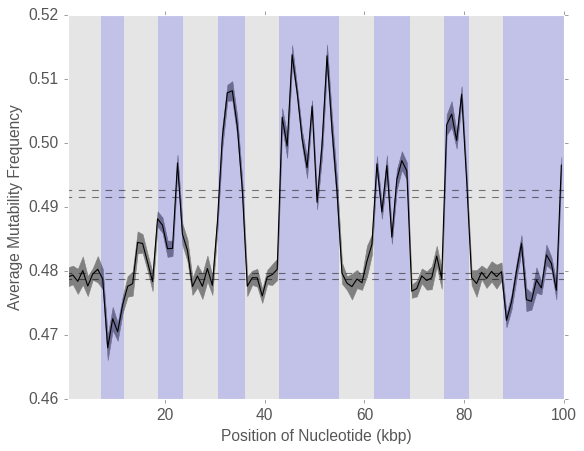

In [192]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
#plt.plot(sliding_window_X, sliding_window_initial, "k", alpha = 0.3, label = "Initial")
plt.plot(sliding_window_X_kb, sliding_window_avMut, "k", label = "Final")


#plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
# plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide (kbp)")
plt.ylabel("Average Mutability Frequency")
plt.xticks([0,20,40,60,80,100])

#adding legend
# plt.legend(loc = 2)

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index]/1000, cds_pos_list[index+1]/1000, alpha=.15, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X_kb,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100)  # adjust the right leaving left unchanged

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

#adding average exon / intron 
plt.hlines(mean_exon_mut-std_exon_mut, 0, 100, colors='k', linestyles='dashed', label='Exon Mean Mutability below', alpha = 0.5)
plt.hlines(mean_exon_mut+std_exon_mut, 0, 100, colors='k', linestyles='dashed', label='Exon Mean Mutability above', alpha = 0.5)
plt.hlines(mean_intron_mut-std_intron_mut, 0, 100, colors='k', linestyles='dashed', label='Intron Mean Mutability below', alpha = 0.5)
plt.hlines(mean_intron_mut+std_intron_mut, 0, 100, colors='k', linestyles='dashed', label='Intron Mean Mutability above', alpha = 0.5)

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Plots/Sliding_{t}_Finalized_avCodingNonCoding.png".format(t = timestamp))

# ** ok need to just settle for plotting the outlier mean starting on the graph ** 

In [42]:
cds_pos_dictionary

{'ENST00000287097.6': [7141, 11479],
 'ENST00000293879.9': [30563, 35810],
 'ENST00000338368.7': [87850, 100144],
 'ENST00000346169.7': [18621, 23421],
 'ENST00000389722.7': [61872, 68859],
 'ENST00000437464.1': [42952, 54730],
 'ENST00000613019.4': [76001, 80708]}

In [49]:
tmp_bounds_list = []
for key, bound in cds_pos_dictionary.items(): 
    tmp_bounds_list.append(bound)
tmp_bounds_list = sorted(tmp_bounds_list, key=lambda k: [k[1], k[0]])   


for i, bound in enumerate(tmp_bounds_list): 
    weights_tmp = []
    for j in range(bound[0]+1, bound[1]-1): 
        triplet = DNAI[j-1: j+2]
        weights_tmp.append(model[triplet][0])
        
    print(str(i), "exon av mut =  ", str(np.mean(weights_tmp)))

0 exon av mut =   0.453124779527
1 exon av mut =   0.491115632049
2 exon av mut =   0.525801125961
3 exon av mut =   0.518324893375
4 exon av mut =   0.499347332718
5 exon av mut =   0.516707721829
6 exon av mut =   0.468165025427


** ok lets add the starting mutability of the exons ** 

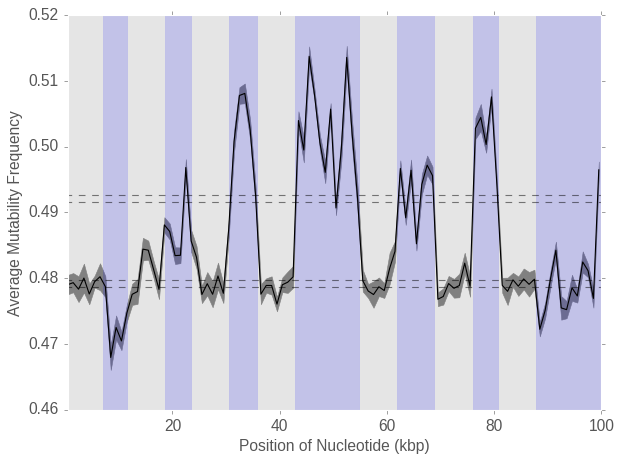

In [189]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
#plt.plot(sliding_window_X, sliding_window_initial, "k", alpha = 0.3, label = "Initial")
plt.plot(sliding_window_X_kb, sliding_window_avMut, "k", label = "Final")


#plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
# plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide (kbp)")
plt.ylabel("Average Mutability Frequency")
plt.xticks([0,20,40,60,80,100])

#adding legend
#plt.legend(loc = 2)

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index]/1000, cds_pos_list[index+1]/1000, alpha=.15, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X_kb,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100)  # adjust the right leaving left unchanged

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

#adding average exon / intron 
plt.hlines(mean_exon_mut-std_exon_mut, 0, 100, colors='k', linestyles='dashed', label='Exon Mean Mutability below', alpha = 0.5)
plt.hlines(mean_exon_mut+std_exon_mut, 0, 100, colors='k', linestyles='dashed', label='Exon Mean Mutability above', alpha = 0.5)
plt.hlines(mean_intron_mut-std_intron_mut, 0, 100, colors='k', linestyles='dashed', label='Intron Mean Mutability below', alpha = 0.5)
plt.hlines(mean_intron_mut+std_intron_mut, 0, 100, colors='k', linestyles='dashed', label='Intron Mean Mutability above', alpha = 0.5)

 plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("Plots/Sliding_{t}_Finalized_avCodingNonCoding.png".format(t = timestamp))

In [ ]:
sliding

In [44]:
DNAI

80706